# Discover Best E-Learning Market

This analysis will uncover the 2 best markets to advertise in for an E-Learning company that teaches programming. For this analysis, an existing survey of new coders from freeCodeCamp will be used to uncover insights about new coders (potential customers of an E-Learning platform). The core competency of the company that is performing this analysis is web and mobile development, and the company will charge $59 per month for access to the learning platform.

In [2]:
import pandas as pd

# ignore Jupyter warnings
import warnings
warnings.filterwarnings('ignore')

# read the data set into a data frame
coder_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

# view the first 5 rows of the data set
coder_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# display the column names for reference
coder_survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

### Initial Understanding of Data Set

This data set is a survey of many developers, which contains several features (columns) about the developer, such as age, income, if they attended a coding bootcamp, if they've watched coding videos on YouTube, their gender, and more.

The data set can be downloaded at https://github.com/freeCodeCamp/2017-new-coder-survey

The intent of using an existing data set instead of creating a new survey is due to the fact that it is much cheaper to use existing data than to create an initiative to gather new data.

In [4]:
# understand if sample is representative of population
# generate a frequency distribution table (by percentage)
coder_survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                                                                      

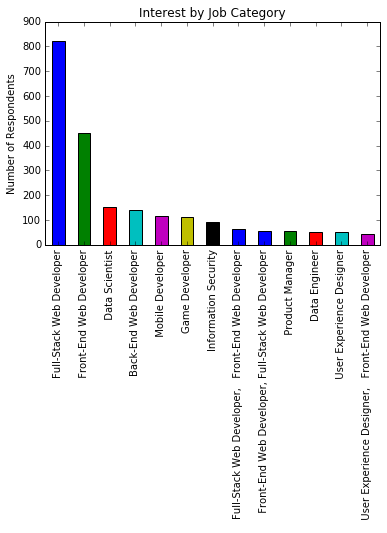

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

# generate a bar chart to visualize interest in different roles (for top 13, not splitting multiple responses into individuals)
coder_survey['JobRoleInterest'].value_counts()[:13].plot.bar()
plt.title('Interest by Job Category')
plt.ylabel('Number of Respondents')
plt.show()

## Initial Job Interest Analysis

For simplicity, the bar graph above only shows the top 13 choices (many of which respondents only selected 1 option). Given this visualization, it is apparent that respondents can choose more than 1 career path as a response. As shown in the bar graph above, most interest (about 1,250 respondents that chose only those values) is Full Stack and Front End Web Development.

The focus of the E-learning company is mobile and web development. There is plenty of opportunity to market to the new coders in this survey, as roughly 1,600 respondents chose a career intereste in either mobile or web development (for only those responses depicted in the graph).

This indicates that the sample that we are using contains valuable information about the market we would intend to engage.

In [6]:
# explore the countries in which the highest number of respondents live
# create new dataframe with only populated values for job interest
job_not_null = coder_survey[coder_survey['JobRoleInterest'].notnull()]

In [7]:
# generate a frequency table for which countries the respondents live in
job_not_null['CountryLive'].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

## Countries Analysis

As shown in the frequency table above, the 2 most popular countries for respondents that took the survey are the US and India. If our recommendation were based on population of respondents in country alone, we'd consider marketing in the US and India. However, we should continue to evaluate if there are other criteria that would make marketing in other countries more valuable.

In [8]:
# evaluate money spent per month on coding lessons for the top 4 countries from the frequncy table

# to avoid dividing by 0, replace 'Months Programming' column with a 1 instead of 0
job_not_null['MonthsProgramming'].replace(0, 1, inplace=True)

# create a new column for money spent per month
job_not_null['MoneySpentPerMonth'] = job_not_null['MoneyForLearning'] / job_not_null['MonthsProgramming']

job_not_null['MonthsProgramming'].isnull().sum()

359

In [9]:
# remove rows with NULL value for MonthsProgramming
valid_months = job_not_null[job_not_null['MonthsProgramming'].notnull()]

In [10]:
# also remove rows with a NULL value for CountryLive
valid_country = valid_months[valid_months['CountryLive'].notnull()]

In [11]:
valid_country['MoneySpentPerMonth'].notnull().value_counts()

True     6212
False     307
Name: MoneySpentPerMonth, dtype: int64

In [12]:
# remove NULL records from MoneySpentPerMonth
valid_money_spent = valid_country[valid_country['MoneySpentPerMonth'].notnull()]

In [13]:
# group the data by CountryLive and find the mean of each category
grouped_countries = valid_money_spent.groupby(['CountryLive']).mean()

In [14]:
# display the average Money Per Month spent by the top 4 countries from the frequency tabl
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

for c in countries:
    print(c)
    print(round(grouped_countries.loc[c]['MoneySpentPerMonth'], 2))

United States of America
228.0
India
135.1
United Kingdom
45.53
Canada
113.51


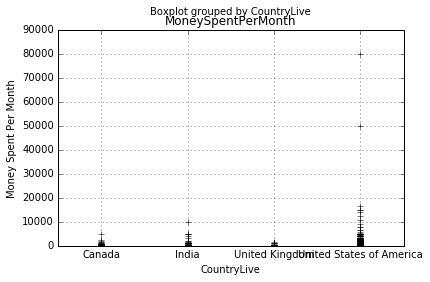

In [15]:
# generate box plots for the amount spent per month on average for the top 4 countries
top_countries = valid_money_spent[valid_money_spent['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

top_countries.boxplot(column='MoneySpentPerMonth', by='CountryLive')
plt.ylim(0, 90000)
plt.ylabel('Money Spent Per Month')
plt.show()

There are 2 outliers for the U.S. - a value of approximately 80,000 and 50,000

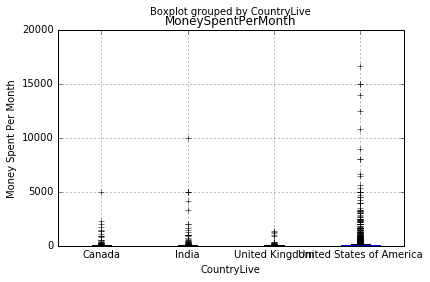

In [16]:
# remove the outlier values for Money Spent Per Month and re-display box plot
no_outliers = top_countries[top_countries['MoneySpentPerMonth'] < 20000]

no_outliers.boxplot(column='MoneySpentPerMonth', by='CountryLive')
plt.ylim(0, 20000)
plt.ylabel('Money Spent Per Month')
plt.show()

In [17]:
# re-calculate the mean for Money Spent Per Month for each of the top 4 countries
second_grouped = no_outliers.groupby(['CountryLive']).mean()

In [19]:
# display the mean values
print(round(second_grouped['MoneySpentPerMonth'], 2))

CountryLive
Canada                      113.51
India                       135.10
United Kingdom               45.53
United States of America    183.80
Name: MoneySpentPerMonth, dtype: float64


There are several values for Money Spent Per Month that are over 5,000, so those outliers will be removed as well

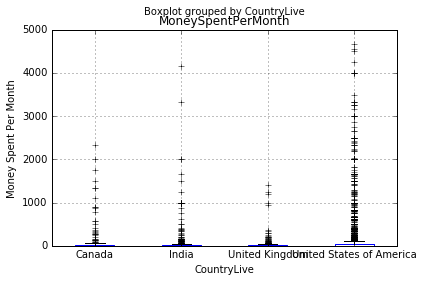

In [20]:
# remove more outliers
less_than_five_k = top_countries[top_countries['MoneySpentPerMonth'] < 5000]

# re-plot the box plot
less_than_five_k.boxplot(column='MoneySpentPerMonth', by='CountryLive')
plt.ylim(0, 5000)
plt.ylabel('Money Spent Per Month')
plt.show()

In [22]:
# re-compute the mean values for Money Spent Per Month for each country
new_grouped = less_than_five_k.groupby(['CountryLive']).mean()
print(round(new_grouped['MoneySpentPerMonth'], 2))

CountryLive
Canada                       93.07
India                        81.81
United Kingdom               45.53
United States of America    130.64
Name: MoneySpentPerMonth, dtype: float64


# Summary

Based on the fact that the USA spends the most per month on average, as well as it has by far the most number of respondents in the initial survey, it is clear that our E-Learning company should market in the U.S. Additionally, India has the second most respondents (over 500), and still spends approximately 81 USD per month on average for coding lessons, so it makes sense to market in India as well. Although Canada spends 93 USD per month on average, the market is relatively small, so it wouldn't be advisable to market in Canada. Additionally, the U.K. only spends about 45 USD per month on average, and our product would be $59 per month, so it does not make sens to market in the U.K.